paket installieren:

Terminal > New Terminal

venv aktivieren:
```
.\.venv\Scripts\activate
```

paket installieren:

```
pip install pandas
``` 

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math


In [289]:
# file paths
path_motors_none_rounded_imu = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/Motors_None_Rounded/2025-01-22_17-03-38.sensors.dat"
path_motors_none_rounded_cam = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/Motors_None_Rounded/2025-01-22_17-03-38.dat"
path_imu_integral_rounded_imu = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/IMU_Integral_Rounded/2025-01-22_16-54-27.sensors.dat"
path_imu_integral_rounded_cam = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/IMU_Integral_Rounded/2025-01-22_16-54-27.dat"
path_imu_madgwick_rounded_imu = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/IMU_Madgwick_Rounded/2025-01-22_15-06-50.sensors.dat"
path_imu_madgwick_rounded_cam = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/IMU_Madgwick_Rounded/2025-01-22_15-06-50.dat"
path_imu_madgwick_square_imu = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/IMU_Madgwick_Square/2025-01-22_16-03-09.sensors.dat"
path_imu_madgwick_square_cam = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/IMU_Madgwick_Square/2025-01-22_16-03-09.dat"
path_pid_rounded_imu = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/PID_tests/2025-02-06_13-58-11.sensors.dat"
path_pid_rounded_cam = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/PID_tests/2025-02-06_13-58-11.dat"

# header für imu daten
column_names_motors = ["frame", "start_stopp", "empty0", "empty1", "empty2", "empty3", "empty4"]
column_names_madgwick = ["frame", "start_stopp", "angle", "o_w", "o_x", "o_y", "o_z"]
column_names_integral = ["frame", "start_stopp", "angle", "NaN", "gyro_x", "gyro_y", "gyro_z"]
column_names_pid = ["frame", "angle", "target", "pid_out", "vl", "vr"]

# dateien einlesen in pd dataframes
df_path_motors_none_rounded_imu = pd.read_csv(path_motors_none_rounded_imu, sep=' ', header=None, names=column_names_motors)
df_path_motors_none_rounded_cam = pd.read_csv(path_motors_none_rounded_cam, sep=' ', header=0)
df_path_imu_integral_rounded_imu = pd.read_csv(path_imu_integral_rounded_imu, sep=' ', header=None, names=column_names_integral)
df_path_imu_integral_rounded_cam = pd.read_csv(path_imu_integral_rounded_cam, sep=' ', header=0)
df_path_imu_madgwick_rounded_imu = pd.read_csv(path_imu_madgwick_rounded_imu, sep=' ', header=None, names=column_names_madgwick)
df_path_imu_madgwick_rounded_cam = pd.read_csv(path_imu_madgwick_rounded_cam, sep=' ', header=0)
df_path_imu_madgwick_square_imu = pd.read_csv(path_imu_madgwick_square_imu, sep=' ', header=None, names=column_names_madgwick)

df_path_imu_madgwick_square_cam = pd.read_csv(path_imu_madgwick_square_cam, sep=' ', header=0)

df_path_imu_pid_rounded_imu = pd.read_csv(path_pid_rounded_imu, sep=' ', header=0)

df_path_imu_pid_rounded_cam = pd.read_csv(path_pid_rounded_cam, sep=' ', header=0)



In [290]:
# print("df_path_motors_none_rounded_imu:")
# print(df_path_motors_none_rounded_imu.head())
# print("df_path_motors_none_rounded_cam:")
# print(df_path_motors_none_rounded_cam.head())
# print("df_path_imu_integral_rounded_imu:")
# print(df_path_imu_integral_rounded_imu.head())
# print("df_path_imu_integral_rounded_cam:")
# print(df_path_imu_integral_rounded_cam.head())
# print("df_path_imu_madgwick_rounded_imu:")
# print(df_path_imu_madgwick_rounded_imu.head())
# print("df_path_imu_madgwick_rounded_cam:")
# print(df_path_imu_madgwick_rounded_cam.head())
# print("df_path_imu_madgwick_square_imu:")
# print(df_path_imu_madgwick_square_imu.head())
# print("df_path_imu_madgwick_square_cam:")
# print(df_path_imu_madgwick_square_cam.head())
print("df_path_imu_pid_rounded_imu:")
print(df_path_imu_pid_rounded_imu.head())

df_path_imu_pid_rounded_imu:
   frame     angle  target   pid_out         vl         vr
0    423  0.000000     0.0  0.000000  60.000000  60.000000
1    425  0.001691     0.0  0.116753  60.116753  59.883247
2    427  0.002392     0.0  0.149932  60.149933  59.850067
3    429  0.004734     0.0  0.305342  60.305344  59.694656
4    430  0.006441     0.0  0.402195  60.402195  59.597805


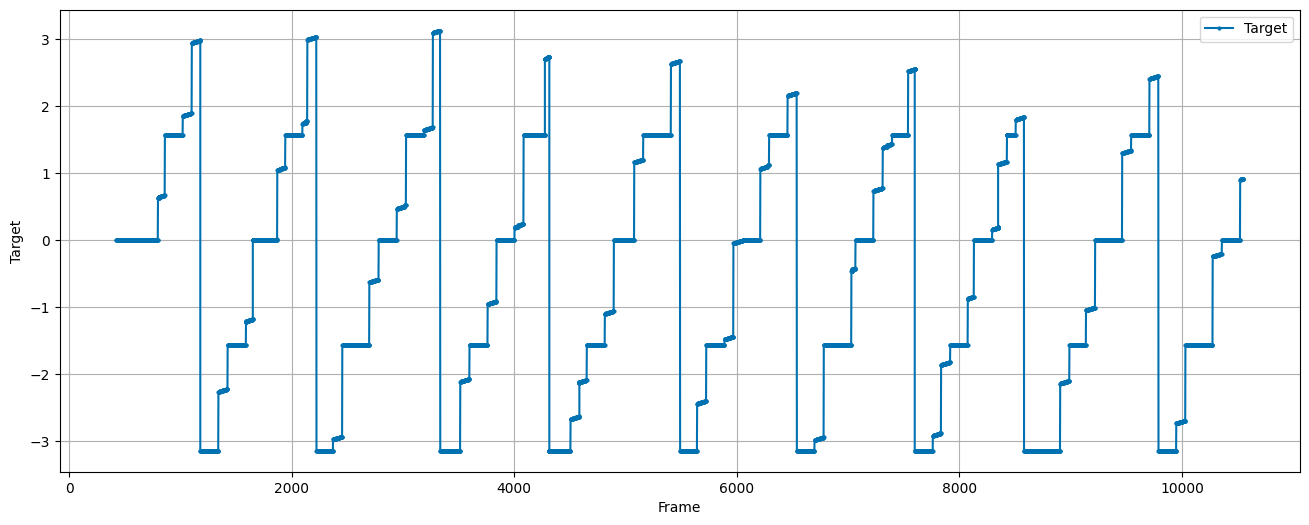

In [291]:
plt.figure(figsize=(16, 6))
plt.plot(df_path_imu_pid_rounded_imu['frame'], df_path_imu_pid_rounded_imu['target'], marker="o", markersize=2, linestyle="-", color="#0072B2", label="Target")
plt.xlabel("Frame")
plt.ylabel("Target")
# plt.xlim(3500, 5000)
plt.grid(True)
plt.legend()
plt.show()

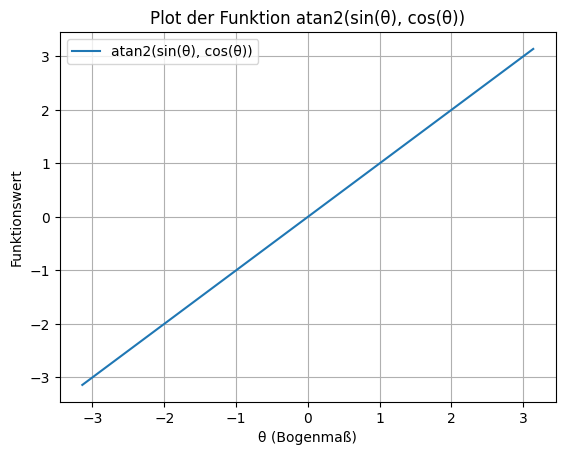

In [292]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Definition der Funktion
def f(theta):
    return math.atan2(math.sin(theta), math.cos(theta))

# Erzeugen eines Arrays von Winkeln von -π bis π
theta = np.linspace(-np.pi, np.pi, 400)

# Anwenden der Funktion auf jedes Element des Arrays
f_values = [f(t) for t in theta]

# Erstellen des Plots
plt.plot(theta, f_values, label='atan2(sin(θ), cos(θ))')
plt.xlabel('θ (Bogenmaß)')
plt.ylabel('Funktionswert')
plt.title('Plot der Funktion atan2(sin(θ), cos(θ))')
plt.legend()
plt.grid(True)
plt.show()

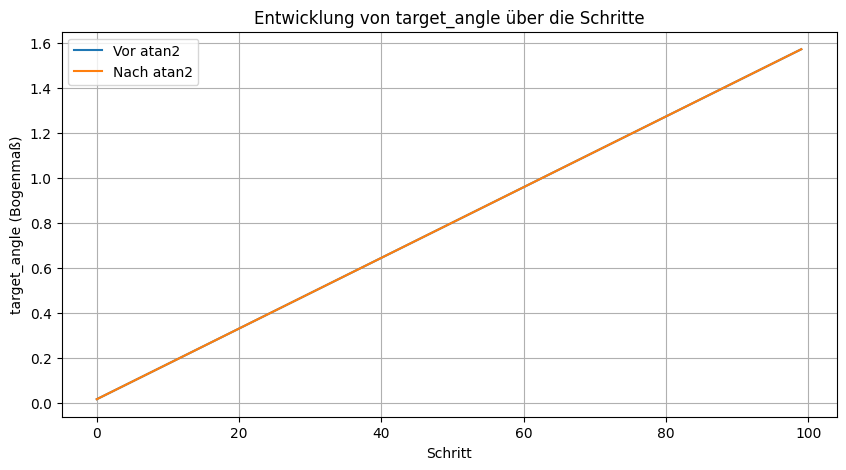

In [293]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Parameter
step_count = 100
initial_target_angle = 0  # Anfangswert von target_angle

# Listen zur Speicherung der Winkelwerte
angles_before_atan2 = []
angles_after_atan2 = []

# Initialisierung des Winkels
target_angle = initial_target_angle

# Schleife über die Schritte
for i in range(step_count):
    
    # Winkel erhöhen
    target_angle += (math.pi / 2) / step_count
    
    # Winkel vor der Anwendung von atan2 speichern
    angles_before_atan2.append(target_angle)

    # Anwendung von atan2
    target_angle = math.atan2(math.sin(target_angle), math.cos(target_angle))
    
    # Winkel nach der Anwendung von atan2 speichern
    angles_after_atan2.append(target_angle)

# Erstellen des Plots
plt.figure(figsize=(10, 5))
plt.plot(range(step_count), angles_before_atan2, label='Vor atan2')
plt.plot(range(step_count), angles_after_atan2, label='Nach atan2')
plt.xlabel('Schritt')
plt.ylabel('target_angle (Bogenmaß)')
plt.title('Entwicklung von target_angle über die Schritte')
plt.legend()
plt.grid(True)
plt.show()


In [294]:
def cyclic_mean(series, period=2 * np.pi):
    """
    Berechnet den Mittelwert einer zyklischen Serie, z. B. für Winkel oder Uhrzeiten.

    Args:
        series (pd.Series): Die Serie mit zyklischen Werten.
        period (float): Der Zyklus der Werte (z. B. 2π für Winkel, 24 für Uhrzeiten).
    
    Returns:
        float: Der zyklische Mittelwert.
    """
    # Umwandlung der Werte in Radien (wenn nicht bereits im passenden Bereich)
    radians = series * (2 * np.pi / period)  # Normierung auf [0, 2π]
    
    # Umrechnung in kartesische Koordinaten
    x = np.cos(radians)
    y = np.sin(radians)
    
    # Durchschnitt der kartesischen Koordinaten berechnen
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Zurück in zyklischen Winkel umrechnen
    mean_angle = np.arctan2(mean_y, mean_x)
    
    # Ergebnis auf den ursprünglichen Zyklus zurückskalieren
    cyclic_mean_value = (mean_angle % (2 * np.pi)) * (period / (2 * np.pi))
    
    return cyclic_mean_value


In [295]:
def cyclic_difference(value1, value2, period=2 * np.pi):
    """
    Berechnet die zyklische Differenz zwischen zwei Werten.

    Args:
        value1 (float): Erster Wert.
        value2 (float): Zweiter Wert.
        period (float): Der Zyklus der Werte (Standard: 2π).
    
    Returns:
        float: Die zyklische Differenz im Bereich [-period/2, period/2].
    """
    # Berechne die rohe Differenz
    raw_diff = value1 - value2
    
    # Bringe die Differenz in den Bereich [-period/2, period/2]
    cyclic_diff = (raw_diff + period / 2) % period - period / 2
    
    return cyclic_diff

In [296]:
# Daten einlesen, ersten Header entfernen, falls doppelt vorhanden
df_path_imu_pid_rounded_imu = pd.read_csv(path_pid_rounded_imu, sep=' ', header=None, names=column_names_pid, skiprows=1)
df_path_imu_pid_rounded_imu.head()

,frame,angle,target,pid_out,vl,vr
0,423,0.000000,0.0,0.000000,60.000000,60.000000
1,425,0.001691,0.0,0.116753,60.116753,59.883247
2,427,0.002392,0.0,0.149932,60.149933,59.850067
3,429,0.004734,0.0,0.305342,60.305344,59.694656
4,430,0.006441,0.0,0.402195,60.402195,59.597805


In [297]:
# "target"-Spalte in float umwandeln (falls nötig)
df_path_imu_pid_rounded_imu["target"] = pd.to_numeric(df_path_imu_pid_rounded_imu["target"], errors='coerce')
df_path_imu_pid_rounded_imu.head()

,frame,angle,target,pid_out,vl,vr
0,423,0.000000,0.0,0.000000,60.000000,60.000000
1,425,0.001691,0.0,0.116753,60.116753,59.883247
2,427,0.002392,0.0,0.149932,60.149933,59.850067
3,429,0.004734,0.0,0.305342,60.305344,59.694656
4,430,0.006441,0.0,0.402195,60.402195,59.597805


In [298]:
# Toleranz für die Erkennung von Vielfachen von pi
tol = 0.001

# Funktion zur Bestimmung von "start_stopp"
def classify_start_stopp(target_values):
    start_stopp = [3]  # Erster Wert ist per Default 3
    
    for i in range(1, len(target_values)):
        prev_target = target_values[i - 1]
        curr_target = target_values[i]
        
        is_prev_pi_multiple = np.isclose(prev_target % (np.pi/2), 0, atol=tol)
        is_curr_pi_multiple = np.isclose(curr_target % (np.pi/2), 0, atol=tol)
        
        if not is_prev_pi_multiple and is_curr_pi_multiple:
            start_stopp.append(0)  # Ende einer Kurve
        elif is_prev_pi_multiple and not is_curr_pi_multiple:
            start_stopp.append(1)  # Beginn einer Kurve
        elif not is_prev_pi_multiple and not is_curr_pi_multiple:
            start_stopp.append(2)  # Kurve
        else:
            start_stopp.append(3)  # Gerade Strecke
    
    return start_stopp

# # Spalte "start_stopp" hinzufügen
# df_path_imu_pid_rounded_imu["start_stopp"] = classify_start_stopp(df_path_imu_pid_rounded_imu["target"].values)
# df_path_imu_pid_rounded_imu.head()

# Spalte "start_stopp" hinzufügen
# copy dataframe
df_path_imu_pid_rounded_imu_start_stop = df_path_imu_pid_rounded_imu.copy()
df_path_imu_pid_rounded_imu_start_stop["start_stopp"] = classify_start_stopp(df_path_imu_pid_rounded_imu_start_stop["target"].values)
# df_path_imu_pid_rounded_imu_start_stop["start_stopp"].values.tolist()
df_path_imu_pid_rounded_imu_start_stop.head()

,frame,angle,target,pid_out,vl,vr,start_stopp
0,423,0.000000,0.0,0.000000,60.000000,60.000000,3
1,425,0.001691,0.0,0.116753,60.116753,59.883247,3
2,427,0.002392,0.0,0.149932,60.149933,59.850067,3
3,429,0.004734,0.0,0.305342,60.305344,59.694656,3
4,430,0.006441,0.0,0.402195,60.402195,59.597805,3


In [299]:
def group_start_stopp(df):
    # Initialize variables
    groups = []
    current_group = [df.index[0]]
    current_value = df.iloc[0]['start_stopp']
    groups_keys = [int(current_value)]

    # Iterate over the DataFrame starting from the second row
    for i in range(1, len(df)):
        value = df.iloc[i]['start_stopp']
        if value == current_value:
            current_group.append(df.index[i])
        else:
            groups.append(np.array(current_group))
            groups_keys.append(int(value))
            current_group = [df.index[i]]
            current_value = value

    # Add the last group
    groups.append(np.array(current_group))

    return groups, groups_keys

In [300]:
groups, groups_keys = group_start_stopp(df_path_imu_pid_rounded_imu_start_stop)
groups, groups_keys

([array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
          39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
          52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
          65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
          78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
          91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
         104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
         117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
         130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
         143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
         156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
         169, 170, 171, 172, 173, 174,

In [301]:
def find_median(arr):
    # Find the middle index
    n = len(arr)
    if n % 2 == 1:
        # Odd number of elements, return the middle one
        return int(arr[n // 2])
    else:
        # Even number of elements, return the average of the two middle values
        return int((arr[n // 2 - 1] + arr[n // 2]) / 2)


In [302]:
groups_medians = [find_median(group) for group in groups]
groups_medians

[94,
 190,
 211,
 232,
 274,
 316,
 358,
 400,
 442,
 484,
 505,
 526,
 568,
 610,
 631,
 652,
 714,
 777,
 798,
 820,
 862,
 904,
 946,
 988,
 1030,
 1072,
 1093,
 1114,
 1177,
 1240,
 1261,
 1282,
 1324,
 1366,
 1387,
 1408,
 1450,
 1492,
 1530,
 1569,
 1614,
 1660,
 1681,
 1702,
 1744,
 1786,
 1807,
 1828,
 1870,
 1912,
 1933,
 1954,
 2017,
 2080,
 2101,
 2122,
 2185,
 2248,
 2290,
 2332,
 2374,
 2416,
 2437,
 2458,
 2521,
 2584,
 2605,
 2626,
 2689,
 2752,
 2773,
 2794,
 2836,
 2878,
 2899,
 2920,
 2962,
 3004,
 3046,
 3088,
 3130,
 3172,
 3193,
 3214,
 3256,
 3298,
 3319,
 3340,
 3382,
 3424,
 3445,
 3466,
 3529,
 3592,
 3613,
 3634,
 3676,
 3718,
 3760,
 3802,
 3844,
 3886,
 3907,
 3928,
 3970,
 4012,
 4054,
 4096,
 4138,
 4180,
 4201,
 4222,
 4264,
 4306,
 4348,
 4390,
 4432,
 4474,
 4495,
 4516,
 4600,
 4684,
 4705,
 4726,
 4768,
 4810,
 4831,
 4852,
 4915,
 4978,
 4999,
 5020,
 5062,
 5104,
 5125,
 5146,
 5188,
 5230,
 5251,
 5272,
 5335,
 5398,
 5419,
 5440,
 5482,
 5524,
 55

In [303]:
df_path_imu_pid_rounded_imu_selected = df_path_imu_pid_rounded_imu_start_stop.iloc[groups_medians]
df_path_imu_pid_rounded_imu_selected.head()

,frame,angle,target,pid_out,vl,vr,start_stopp
94,609,-0.007689,0.000000,-0.436963,59.563038,60.436962,3
190,799,0.329502,0.628319,-20.589455,39.410545,80.589455,1
211,820,0.330115,0.644027,-21.668831,38.331169,81.668831,2
232,861,1.657702,1.570797,-2.842841,57.157158,62.842842,0
274,943,1.682068,1.570797,2.664427,62.664429,57.335571,3


In [320]:
# aufräumen

# alte kurven ende werte entfernen
# drop 0
df_path_imu_pid_rounded_imu_clean = df_path_imu_pid_rounded_imu_selected[df_path_imu_pid_rounded_imu_selected.start_stopp != 0]
df_path_imu_pid_rounded_imu_clean.head()

,frame,angle,target,pid_out,vl,vr,start_stopp
94,609,-0.007689,0.000000,-0.436963,59.563038,60.436962,3
190,799,0.329502,0.628319,-20.589455,39.410545,80.589455,1
211,820,0.330115,0.644027,-21.668831,38.331169,81.668831,2
274,943,1.682068,1.570797,2.664427,62.664429,57.335571,3
316,1022,1.654006,1.853540,-14.562201,45.437798,74.562202,1


In [321]:
# kurven entfernen
# drop 2
df_path_imu_pid_rounded_imu_clean = df_path_imu_pid_rounded_imu_clean[df_path_imu_pid_rounded_imu_clean.start_stopp != 2]
df_path_imu_pid_rounded_imu_clean.head()

,frame,angle,target,pid_out,vl,vr,start_stopp
94,609,-0.007689,0.000000,-0.436963,59.563038,60.436962,3
190,799,0.329502,0.628319,-20.589455,39.410545,80.589455,1
274,943,1.682068,1.570797,2.664427,62.664429,57.335571,3
316,1022,1.654006,1.853540,-14.562201,45.437798,74.562202,1
442,1259,3.210676,-3.141592,0.642052,60.642052,59.357948,3


In [322]:
# rename 3 -> 0
df_path_imu_pid_rounded_imu_clean = df_path_imu_pid_rounded_imu_clean.replace(3, 0)
df_path_imu_pid_rounded_imu_clean.head()

,frame,angle,target,pid_out,vl,vr,start_stopp
94,609,-0.007689,0.000000,-0.436963,59.563038,60.436962,0
190,799,0.329502,0.628319,-20.589455,39.410545,80.589455,1
274,943,1.682068,1.570797,2.664427,62.664429,57.335571,0
316,1022,1.654006,1.853540,-14.562201,45.437798,74.562202,1
442,1259,3.210676,-3.141592,0.642052,60.642052,59.357948,0


In [323]:
# remove first row, da mit kurven ende beginnt
df_path_imu_pid_rounded_imu_clean = df_path_imu_pid_rounded_imu_clean.iloc[1:]
df_path_imu_pid_rounded_imu_clean.head(8)

,frame,angle,target,pid_out,vl,vr,start_stopp
190,799,0.329502,0.628319,-20.589455,39.410545,80.589455,1
274,943,1.682068,1.570797,2.664427,62.664429,57.335571,0
316,1022,1.654006,1.853540,-14.562201,45.437798,74.562202,1
442,1259,3.210676,-3.141592,0.642052,60.642052,59.357948,0
484,1342,3.843274,-2.261945,-16.174320,43.825680,76.174316,1
568,1508,4.798263,-1.570794,0.895382,60.895382,59.104618,0
610,1589,4.907307,-1.225219,-12.201782,47.798218,72.201782,1
714,1747,-6.183666,0.000002,0.488180,60.488178,59.511822,0


In [308]:
df_path_imu_pid_rounded_imu = df_path_imu_pid_rounded_imu_clean

In [309]:
# # alle zeilen mit start_stopp = 2 entfernen
# df_path_imu_pid_rounded_imu = df_path_imu_pid_rounded_imu[df_path_imu_pid_rounded_imu.start_stopp != 2]

# # Ergebnis anzeigen
# print(df_path_imu_pid_rounded_imu)

# Ergebnis in CSV speichern
#df_path_imu_pid_rounded_imu.to_csv("c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/PID_tests/pid_start_stopp.csv", index=False)

# 799: 1. Kurve beginnt
# 861: 1. Kurve endet
# 1022: 2. Kurve beginnt
# 1179: 2. Kurve endet





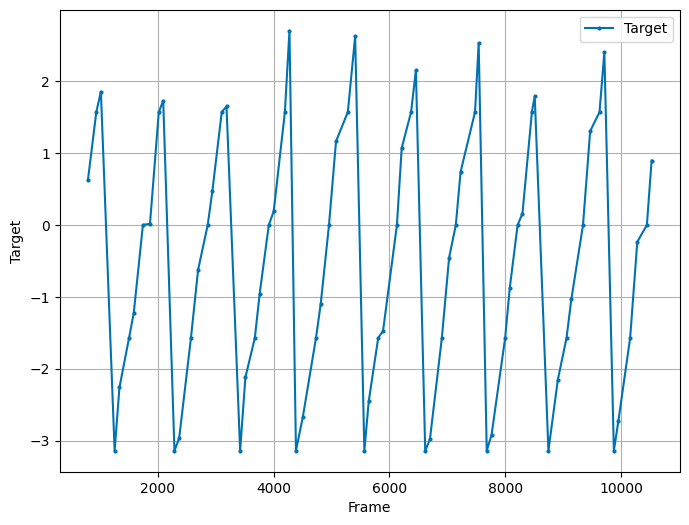

In [310]:
plt.figure(figsize=(8, 6))
plt.plot(df_path_imu_pid_rounded_imu['frame'], df_path_imu_pid_rounded_imu['target'], marker="o", markersize=2, linestyle="-", color="#0072B2", label="Target")
plt.xlabel("Frame")
plt.ylabel("Target")
plt.grid(True)
plt.legend()
plt.show()

In [311]:
results = []

# für Motors_None_Rounded (avg_angle_diff: 1.5197440654558285)
# df_imu = df_path_motors_none_rounded_imu
# df_cam = df_path_motors_none_rounded_cam

# für IMU_Integral_Rounded (avg_angle_diff: 1.4782854744422966)
# df_imu = df_path_imu_integral_rounded_imu
# df_cam = df_path_imu_integral_rounded_cam

# für IMU_Madgwick_Rounded (avg_angle_diff: 1.3997784776570412)
# df_imu = df_path_imu_madgwick_rounded_imu
# df_cam = df_path_imu_madgwick_rounded_cam

# für IMU_Madgwick_Square (avg_angle_diff: 1.4912999356180014)
# df_imu = df_path_imu_madgwick_square_imu
# df_cam = df_path_imu_madgwick_square_cam

# für PID_tests (avg_angle_diff:)
df_imu = df_path_imu_pid_rounded_imu
df_cam = df_path_imu_pid_rounded_cam


# Iteration über jede Zeile von df_imu
for _, row in df_imu.iterrows():
    frame_value = row['frame']
    start_stopp = row['start_stopp']
    
    # Finde die Zeile in df_cam, die diesem frame entspricht
    df_cam_before_frame = df_cam[df_cam['frame'] < frame_value]
    
    # Berechne den Durchschnitt der letzten 20 Werte in der 'angle'-Spalte
    if len(df_cam_before_frame) >= 20:
        last_20_values = df_cam_before_frame['phi'].tail(20)
        avg_angle_last_20 = cyclic_mean(last_20_values, period=2 * np.pi)
    else:
        # Falls weniger als 20 Werte vorhanden sind, den Durchschnitt der verfügbaren berechnen
        avg_angle_last_20 = cyclic_mean(df_cam_before_frame['phi'], period=2 * np.pi)
    
    # Finde die Zeile in df_cam, die dem nächsten frame entspricht
    df_cam_after_frame = df_cam[df_cam['frame'] > frame_value]

    # Berechne den Durchschnitt der nächsten 20 Werte in der 'angle'-Spalte
    if len(df_cam_after_frame) >= 20:
        next_20_values = df_cam_after_frame['phi'].head(20)
        avg_angle_next_20 = cyclic_mean(next_20_values, period=2 * np.pi)
    else:
        # Falls weniger als 20 Werte vorhanden sind, den Durchschnitt der verfügbaren berechnen
        avg_angle_next_20 = cyclic_mean(df_cam_after_frame['phi'], period=2 * np.pi)
    
    # Füge das Ergebnis in das neue DataFrame hinzu
    results.append({'frame': frame_value, 'start_stopp': start_stopp, 'avg_angle_last_20': avg_angle_last_20, 'avg_angle_next_20': avg_angle_next_20})

# Konvertiere die Ergebnisse in ein DataFrame
result_df = pd.DataFrame(results)

# result_df abschneiden nach 72 werten
result_df = result_df.head(72)

# print frame aus letzter zeile von result_df
print(result_df['frame'].iloc[-1])

result_df['angle_diff_prev'] = cyclic_difference(result_df['avg_angle_last_20'], result_df['avg_angle_next_20'].shift(1),period=2 * np.pi)

print(result_df)
print(cyclic_mean(result_df['angle_diff_prev'], period=2 * np.pi))
print(last_20_values)

# ganzes result_df in csv speichern
# result_df.to_csv("c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/IMU_Integral_Rounded/test.csv", index=False)



10441.0
      frame  start_stopp  avg_angle_last_20  avg_angle_next_20  \
0     799.0          1.0           3.143974           3.268873   
1     943.0          0.0           4.714467           4.712385   
2    1022.0          1.0           4.708453           4.708602   
3    1259.0          0.0           6.252444           6.215170   
4    1342.0          1.0           6.188826           0.098294   
..      ...          ...                ...                ...   
67   9871.0          0.0           4.610286           4.607104   
68   9948.0          1.0           4.563699           4.530643   
69  10152.0          0.0           6.119754           6.104511   
70  10275.0          1.0           0.138157           0.532146   
71  10441.0          0.0           1.370496           1.355946   

    angle_diff_prev  
0               NaN  
1          1.445594  
2         -0.003932  
3          1.543843  
4         -0.026344  
..              ...  
67         1.334800  
68        -0.043405  
6

# IMU Madgwick Square
0.23007097445754093

# IMU Madgwick Rounded
0.6052534384454791

# IMU Integral Rounded
0.5931432167263991

# Motors None Rounded
0.5591626668153413

In [312]:
# Neues DataFrame für die Ergebnisse
curves = []
curve_number = 1

# Iteration über result_df in Paaren
for i in range(len(result_df) - 1):
    if result_df.iloc[i]['start_stopp'] == 1 and result_df.iloc[i + 1]['start_stopp'] == 0:
        before_angle = result_df.iloc[i]['avg_angle_last_20']
        after_angle = result_df.iloc[i + 1]['avg_angle_next_20']
        angle_diff = cyclic_difference(after_angle, before_angle)

        frame_diff = result_df.iloc[i + 1]['frame'] - result_df.iloc[i]['frame']

        # Prüfen, ob angle_diff > π und ggf. π abziehen
        # if angle_diff > math.pi:
        #     angle_diff -= 2*math.pi
        
        # Füge die Werte der aktuellen Kurve hinzu
        curves.append({
            'curve_number': curve_number,
            'before_frame': result_df.iloc[i]['frame'],
            'before_angle': before_angle,
            'after_frame': result_df.iloc[i + 1]['frame'],
            'after_angle': after_angle,
            'angle_diff': angle_diff,
            'frame_diff': frame_diff,
        })
        curve_number += 1

# Konvertiere die Liste der Kurven in ein DataFrame
curves_df = pd.DataFrame(curves)

# dataframe abschneiden nach kurve 40
curves_df = curves_df[curves_df['curve_number'] <= 36]

print(curves_df[['before_frame', 'after_frame', 'before_angle', 'after_angle', 'angle_diff', 'frame_diff']])

    before_frame  after_frame  before_angle  after_angle  angle_diff  \
0          799.0        943.0      3.143974     4.712385    1.568412   
1         1022.0       1259.0      4.708453     6.215170    1.506717   
2         1342.0       1508.0      6.188826     1.512548    1.606907   
3         1589.0       1747.0      1.428952     2.995632    1.566679   
4         1869.0       2021.0      2.927839     4.506191    1.578352   
5         2097.0       2291.0      4.464332     6.010606    1.546274   
6         2372.0       2576.0      5.984165     1.243003    1.542023   
7         2698.0       2865.0      1.244379     2.740595    1.496216   
8         2945.0       3107.0      2.700528     4.266090    1.565562   
9         3189.0       3424.0      4.238545     5.762870    1.524324   
10        3515.0       3678.0      5.859934     1.003425    1.426676   
11        3761.0       3919.0      0.952098     2.557386    1.605288   
12        4003.0       4196.0      2.515457     4.056524    1.54

In [313]:
# durchschnitt für angle_diff aus curves_df berechnen
angle_diff_avg = curves_df['angle_diff'].mean()
angle_diff_std = curves_df['angle_diff'].std()
angle_diff_min = curves_df['angle_diff'].min()
angle_diff_max = curves_df['angle_diff'].max()
print("angle_diff_avg:", angle_diff_avg)
print("angle_diff_std:", angle_diff_std)
print("angle_diff_min:", angle_diff_min)
print("angle_diff_max:", angle_diff_max)

print((np.pi)/2)

angle_diff_avg: 1.5143000852840978
angle_diff_std: 0.09106872121827435
angle_diff_min: 1.2177882715144435
angle_diff_max: 1.6189897192688854
1.5707963267948966


# Motors_None_Rounded
pi/2: 1.5707963267948966 \
angle_diff_avg: 1.4967479531240124 \
angle_diff_std: 0.03614608905968683 \
angle_diff_min: 1.3797297454742905 \
angle_diff_max: 1.5812122948826817 

# IMU_Integral_Rounded
pi/2: 1.5707963267948966 \
angle_diff_avg: 1.528037163012127 \
angle_diff_std: 0.03054410336645176 \
angle_diff_min: 1.46811859290787 \
angle_diff_max: 1.5849497893218487 

# IMU_Madgwick_Square
pi/2: 1.5707963267948966 \
angle_diff_avg: 1.5702883845330975 \
angle_diff_std: 0.017692093995443962 \
angle_diff_min: 1.5461179065283241 \
angle_diff_max: 1.620963152947934

# IMU_Madgwick_Rounded
pi/2: 1.5707963267948966 \
angle_diff_avg: 1.562401486477613 \
angle_diff_std: 0.028683934108683796 \
angle_diff_min: 1.4774013953564875 \
angle_diff_max: 1.6253780882191933 

# IMU_PID_Rounded
pi/2: 1.5707963267948966 \
angle_diff_avg: 1.5143000852840978 \
angle_diff_std: 0.09106872121827435 \
angle_diff_min: 1.2177882715144435 \
angle_diff_max: 1.6189897192688854



C:\Users\charl\AppData\Local\Temp\ipykernel_21824\4003737193.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


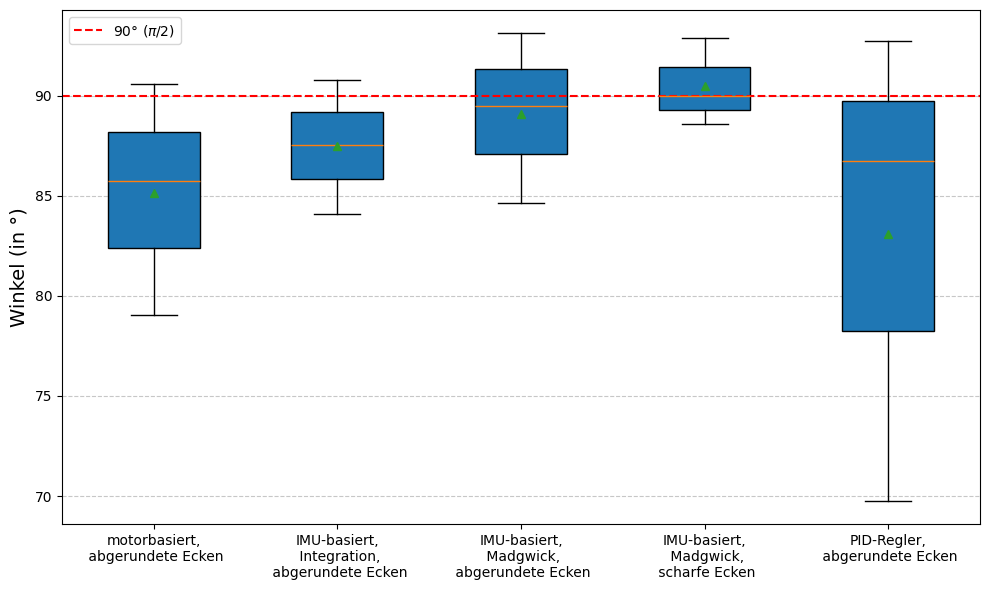

In [318]:
#import matplotlib.pyplot as plt

# Daten in Radiant
data = {
    "motorbasiert,\n abgerundete Ecken": [1.4967479531240124, 1.3797297454742905, 1.5812122948826817],
    "IMU-basiert,\n Integration,\n abgerundete Ecken": [1.528037163012127, 1.46811859290787, 1.5849497893218487],
    "IMU-basiert,\n Madgwick,\n abgerundete Ecken": [1.562401486477613, 1.4774013953564875, 1.6253780882191933],
    "IMU-basiert,\n Madgwick,\n scharfe Ecken": [1.5702883845330975, 1.5461179065283241, 1.620963152947934],
    "PID-Regler,\n abgerundete Ecken": [1.5143000852840978, 1.2177882715144435, 1.6189897192688854],
}

# Daten von Radiant in Grad umrechnen
data_deg = {key: [np.degrees(value) for value in values] for key, values in data.items()}

# Boxplot erstellen
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(
    data_deg.values(), 
    vert=True, 
    patch_artist=True, 
    labels=data_deg.keys(), 
    showmeans=True
)

# Stil und Beschriftung
# ax.set_title("Boxplot für gefahrene Winkel (in °)", fontsize=16)
ax.set_ylabel("Winkel (in °)", fontsize=14)
ax.axhline(y=np.degrees(1.5707963267948966), color='r', linestyle='--', label=r"90° ($\pi$/2)")
ax.legend()

# Plot anzeigen
plt.xticks()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [315]:
# daten für drift-analyse einlesen
path_drift = "c:/Users/charl/Desktop/Uni_Leipzig/MA/Code/PlatformIO/IMU_Audit/MA_files/Recherche/Ergebnisse/drift_log.txt"
df_drift = pd.read_csv(path_drift, sep=' ', header=0)
print(df_drift.head())


          x         y         z
0  0.080023 -0.050702 -0.014661
1  0.060781 -0.052840 -0.019853
2  0.026267 -0.043066 -0.019548
3  0.016188 -0.041539 -0.002749
4  0.042150 -0.042150 -0.038179


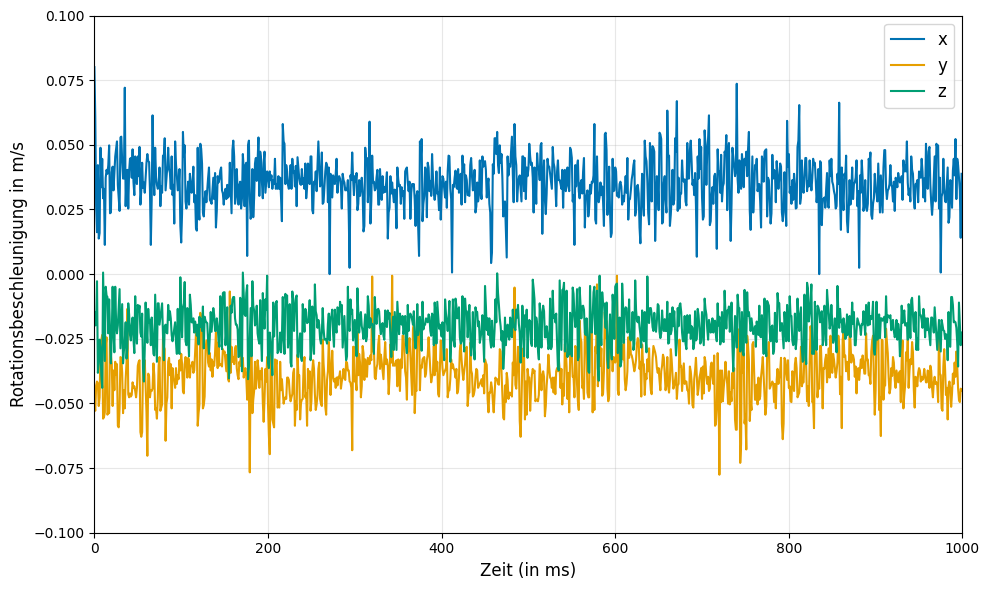

In [316]:
# Plot
plt.figure(figsize=(10, 6))

# Verlauf der Spalten plotten
colors = ["#0072B2", "#E69F00", "#009E73"]  
plt.plot(df_drift.index, df_drift["x"], label="x", color=colors[0])
plt.plot(df_drift.index, df_drift["y"], label="y", color=colors[1])
plt.plot(df_drift.index, df_drift["z"], label="z", color=colors[2])

# Achsentitel und Beschriftungen
# plt.title("Drift des Gyroskops (x-. y-, z-Achse) gemessen bei Stillstand des Roboters für 1000 ms", fontsize=14)
plt.xlabel("Zeit (in ms)", fontsize=12)
plt.ylabel("Rotationsbeschleunigung in m/s", fontsize=12)

# Legende und Gitter
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Diagramm anzeigen
plt.xlim(0, 1000)
plt.ylim(-0.1, 0.1)
plt.tight_layout()
plt.show()

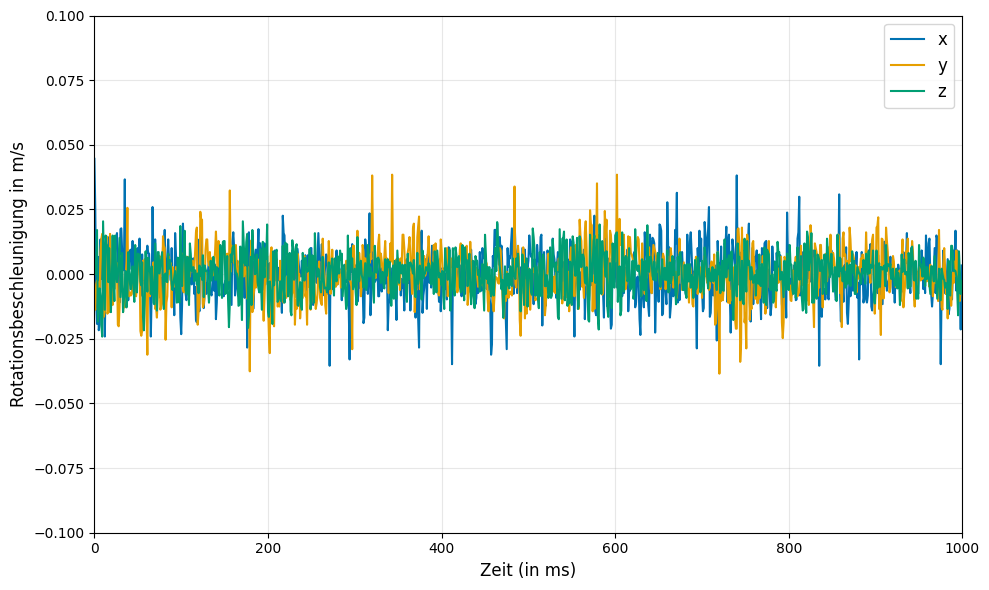

In [317]:
# gleicher plot aber durchschnittswerte über 1000 ms ermittelt und abgezogen

# Durchschnittswert für x-, y- und z-Achse berechnen
df_drift_avg_x = df_drift["x"].mean()
df_drift_avg_y = df_drift["y"].mean()
df_drift_avg_z = df_drift["z"].mean()

# Durchschnittswerte von den Spalten abziehen
df_drift_avg = df_drift.copy()
df_drift_avg["x"] -= df_drift_avg_x
df_drift_avg["y"] -= df_drift_avg_y
df_drift_avg["z"] -= df_drift_avg_z

# Plot
plt.figure(figsize=(10, 6))

# Verlauf der Spalten plotten
# plt.plot(df_drift_avg.index, df_drift_avg["x"], label="x")
# plt.plot(df_drift_avg.index, df_drift_avg["y"], label="y")
# plt.plot(df_drift_avg.index, df_drift_avg["z"], label="z")
# Verlauf der Spalten plotten
colors = ["#0072B2", "#E69F00", "#009E73"]  
plt.plot(df_drift_avg.index, df_drift_avg["x"], label="x", color=colors[0])
plt.plot(df_drift_avg.index, df_drift_avg["y"], label="y", color=colors[1])
plt.plot(df_drift_avg.index, df_drift_avg["z"], label="z", color=colors[2])

# Achsentitel und Beschriftungen
# plt.title("Drift des Gyroskops (x-. y-, z-Achse) gemessen bei Stillstand des Roboters für 1000 ms, kalibriert", fontsize=14)
plt.xlabel("Zeit (in ms)", fontsize=12)
plt.ylabel("Rotationsbeschleunigung in m/s", fontsize=12)

# Legende und Gitter
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Diagramm anzeigen
# gleicher ausschnitt wie oben
plt.xlim(0, 1000)
plt.ylim(-0.1, 0.1)
plt.tight_layout()
plt.show()
